In [45]:
import numpy as np
import pandas as pd
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target


In [47]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Add the target variable to the dataframe
df['target'] = dataset.target

# Print the first 5 rows of the dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [48]:
y = df.pop("target")
X = df

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# Convert to NumPy arrays with C-style contiguous memory layout
X_train = np.asarray(X_train, order='C')
X_test = np.asarray(X_test, order='C')
y_train = np.asarray(y_train, order='C')
y_test = np.asarray(y_test, order='C')

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.916083916083916


In [51]:
#from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train, y_train)
#knn.score(X_test, y_test)

In [52]:
from sklearn.ensemble import BaggingClassifier

# TODO: Check sklearn documentation on what is a OOB score and what is the reason for using it?

bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3,oob_score=True) 


bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

0.9370629370629371

##### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(min_samples_split=2)
model_dt.fit(X_train,y_train)
model_dt.score(X_test, y_test)

0.9370629370629371

In [54]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=24, min_samples_leaf=1)
model_dt.fit(X_train,y_train)
model_dt.score(X_test, y_test)

0.8951048951048951

##### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=6)
model_rf.fit(X_train,y_train)
model_rf.score(X_test, y_test)

0.9370629370629371

In [56]:
grid_param = {
    "n_estimators" : [90,100],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(5,10,1),
    'min_samples_leaf' : range(1,4,1),
    'min_samples_split': range(2,5,1),
    'max_features' : ['auto','log2']
}

In [57]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model_rf, param_grid=grid_param, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits



540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
294 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\achal\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\achal\miniconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\achal\miniconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\achal\miniconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise Invalid

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 5),
                         'n_estimators': [90, 100]},
             verbose=3)

In [58]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [59]:
model_best_rf = RandomForestClassifier(random_state=6, **grid_search.best_params_)
model_best_rf.fit(X_train,y_train)

model_best_rf.score(X_test, y_test)

0.9440559440559441

In [60]:
model_best_rf.n_estimators

100

In [61]:
len(model_best_rf.estimators_)

100

In [62]:
model_best_rf.estimators_[2]

DecisionTreeClassifier(max_depth=8, max_features='log2',
                       random_state=1425842403)

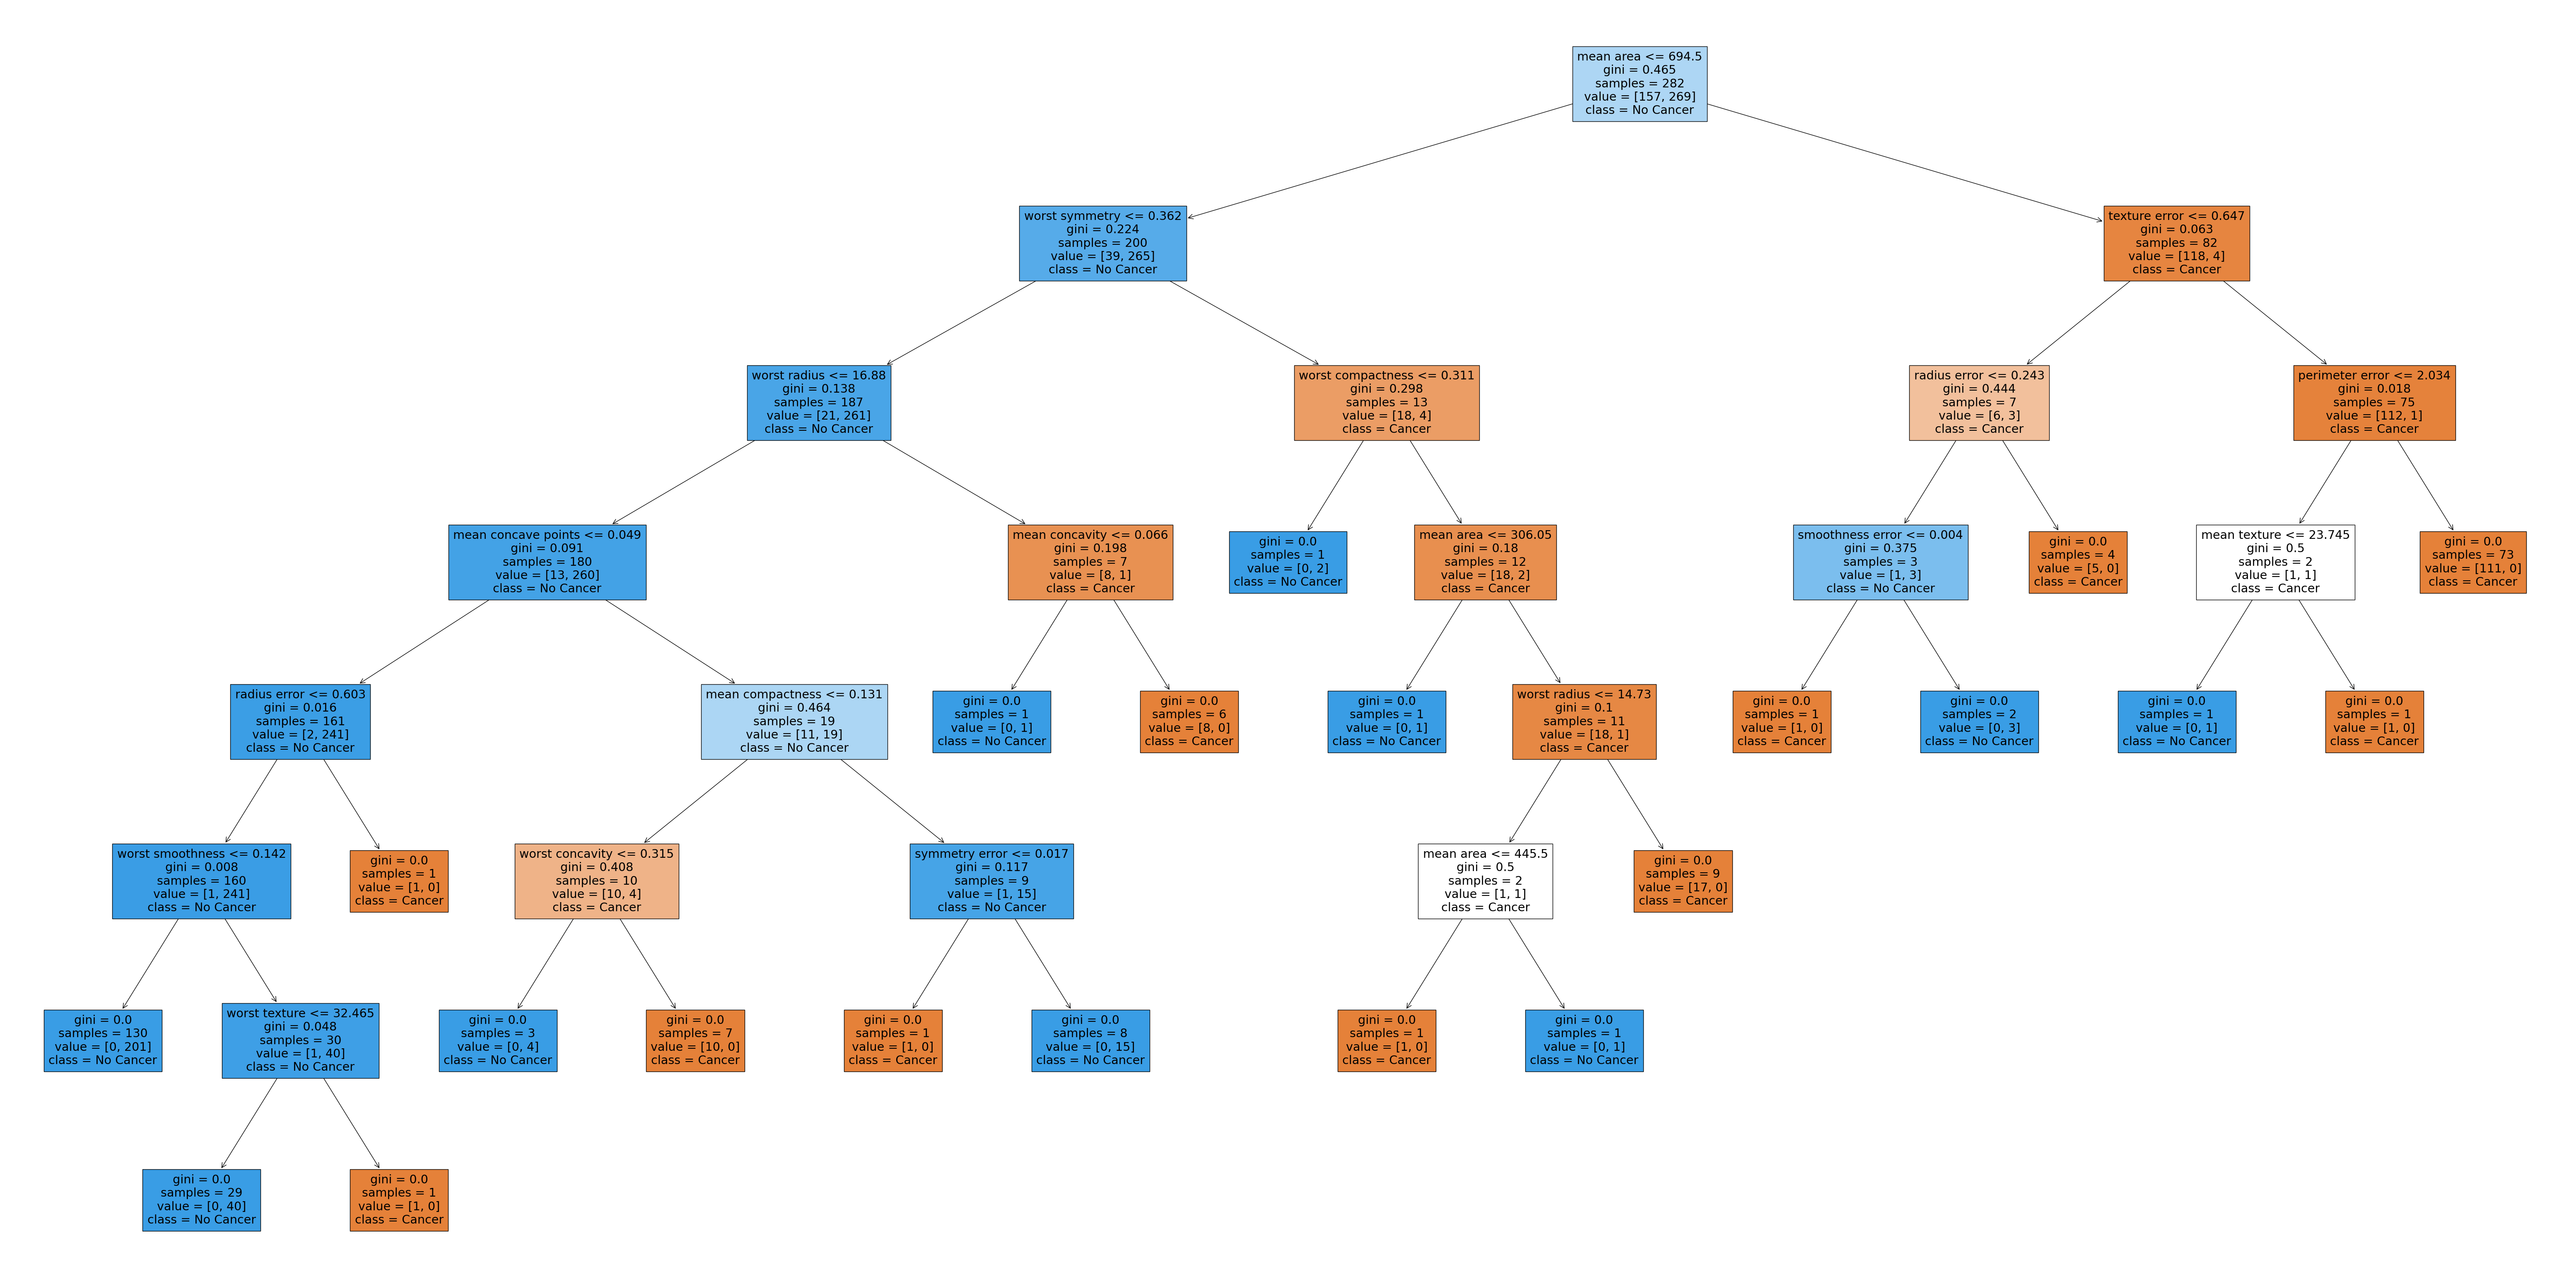

In [63]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(model_best_rf.estimators_[2], feature_names = dataset.feature_names,class_names=['Cancer', "No Cancer"],filled=True);

##### Feature Importance

The Random Forest algorithm has built-in feature importance which can be computed in two ways:
1. Gini importance (or mean decrease impurity)
2. Mean Decrease Accuracy - is a method of computing the feature importance on permuted out-of-bag (OOB) samples based on mean decrease in the accuracy. This method is not implemented in the scikit-learn package

Gini importance is computed from Random Forest structure. In the Rf construction, we can measure how each feature decreases the impurity of the split. For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. The drawbacks of the method is to tendency to prefer numerical features and categorical features with high cardinality. For correlated features, it may even select one of the feature and neglect the importance of the second one leading to wrong conclusions.

In [64]:
print(dataset.feature_names)
print(model_best_rf.feature_importances_)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0.04584715 0.01737288 0.08040824 0.07368494 0.0047877  0.01033181
 0.04498912 0.08696232 0.00423567 0.00469967 0.02167294 0.00408307
 0.02846365 0.03785914 0.00588641 0.00383378 0.00853213 0.00210438
 0.00688739 0.00486388 0.09981612 0.01157229 0.12301458 0.08318998
 0.01423147 0.00950032 0.02753971 0.11036474 0.01446912 0.00879542]


<BarContainer object of 30 artists>

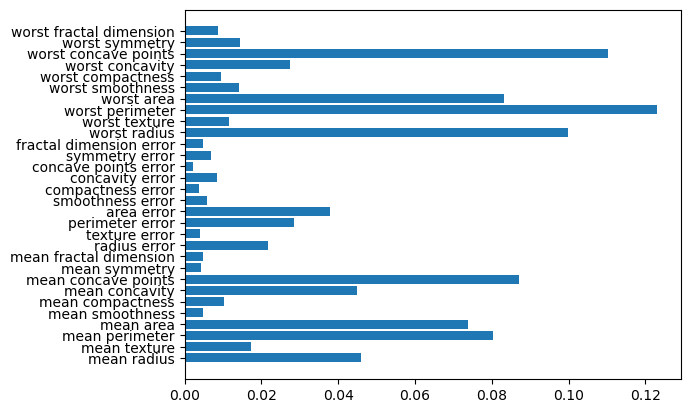

In [65]:
plt.barh(dataset.feature_names, model_best_rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

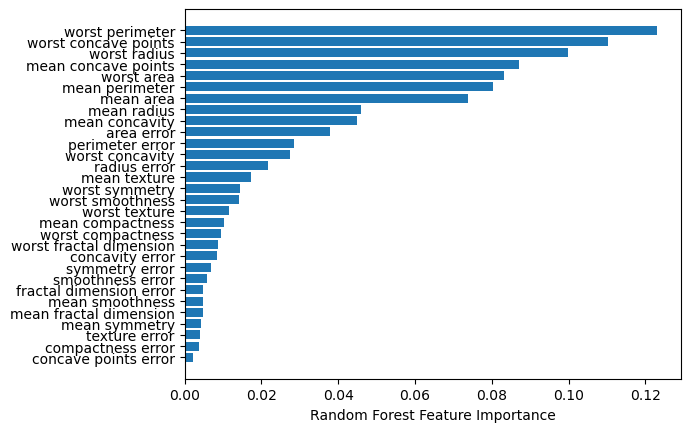

In [66]:
sorted_idx = model_best_rf.feature_importances_.argsort()
plt.barh(dataset.feature_names[sorted_idx], model_best_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

##### Permutation based feature importance

Permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. This method randomly shuffles each feature and compute the change in the model’s performance. The features impacting performance the most are the most important ones.

Text(0.5, 0, 'Permutation Importance')

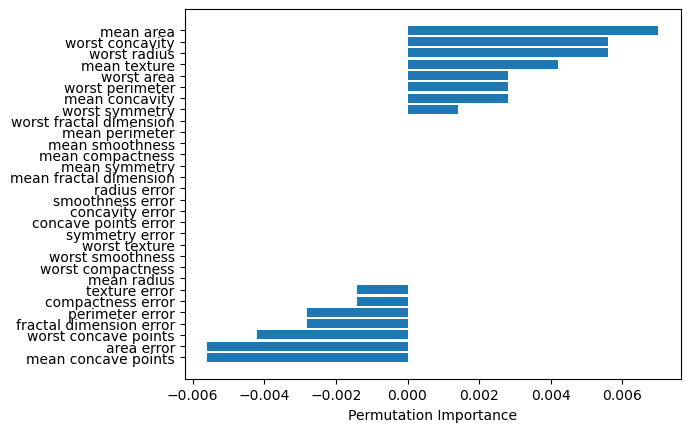

In [67]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model_best_rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(dataset.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

##### SHAP based feature importance

Shapley values are calculated using Cooperative Game Theory. Gives feature importance breakdown per class (label) also

In [68]:
import shap # Requires SHAP install in your environment

explainer = shap.TreeExplainer(model_best_rf)
shap_values = explainer.shap_values(X_test)

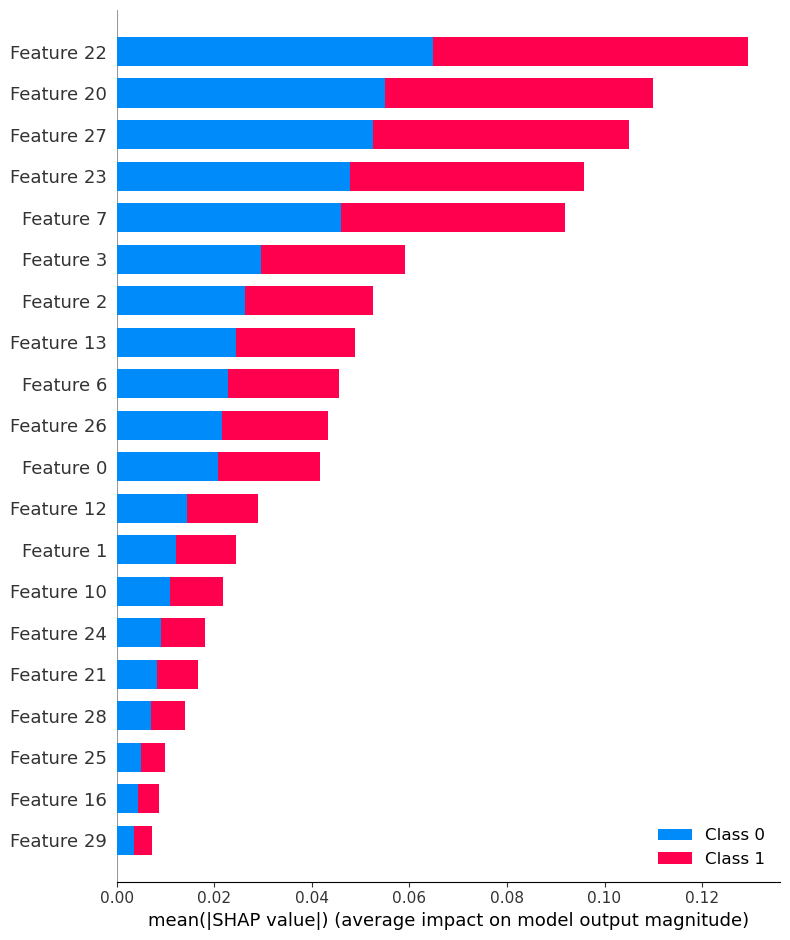

In [69]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [70]:
import shap

# Assuming X_test is a NumPy array
chosen_instance = X_test[[0]]  # Slicing directly for a NumPy array
shap_values_inst = explainer.shap_values(chosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_inst[1], chosen_instance)


In [71]:
#choosen_instance = X_test.iloc[[0]]
#shap_values_inst = explainer.shap_values(choosen_instance)
#shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values_inst[1], choosen_instance)

Above is a force plot for feature shapley values. Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect. Feature values in blue cause to decrease the prediction. Sum of all feature SHAP values explain why model prediction was different from the baseline.

#### Evaluation metrics

In [72]:
from sklearn.metrics import accuracy_score
y_pred = model_best_rf.predict(X_test)
accuracy_score(y_pred=y_pred, y_true=y_test)

0.9440559440559441

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

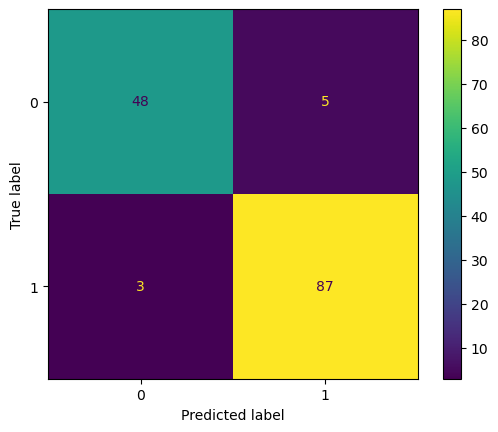

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

print(f"Precision = {precision_score(y_test, y_pred)}")
print(f"Recall = {recall_score(y_test, y_pred)}")
print(f"F-1 score = {f1_score(y_test, y_pred)}")
print(f"F-2 score = {fbeta_score(y_test, y_pred, beta=2)}")

Precision = 0.9456521739130435
Recall = 0.9666666666666667
F-1 score = 0.956043956043956
F-2 score = 0.9623893805309733


In [76]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.94117647, 0.94565217]),
 array([0.90566038, 0.96666667]),
 array([0.92307692, 0.95604396]),
 array([53, 90], dtype=int64))

In [77]:
# macro average is arithmetic mean of per class scores
# Read this: https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.95      0.97      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



##### Evaluating Random Forest model performance and robustness with ROC

In [78]:
# Predict probabilities instead of 1/0 label
y_pred_prob = model_best_rf.predict_proba(X_test)
y_pred_prob

array([[1.00884956e-02, 9.89911504e-01],
       [1.60204082e-01, 8.39795918e-01],
       [7.58849558e-03, 9.92411504e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.90000000e-01, 1.00000000e-02],
       [3.00884956e-02, 9.69911504e-01],
       [1.02040816e-02, 9.89795918e-01],
       [2.04081633e-04, 9.99795918e-01],
       [0.00000000e+00, 1.00000000e+00],
       [8.33333333e-04, 9.99166667e-01],
       [1.75516224e-03, 9.98244838e-01],
       [8.30000000e-01, 1.70000000e-01],
       [8.84955752e-05, 9.99911504e-01],
       [4.31428571e-01, 5.68571429e-01],
       [8.84955752e-05, 9.99911504e-01],
       [1.80870279e-03, 9.98191297e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.00884956e-02, 9.89911504e-01],
       [1.00000000e+00, 0.00000000e+00],
       [6.60374150e-02, 9.33962585e-01],
       [8.84955752e-05, 9.99911504e-01],
       [0.00000000e+00, 1.00000000e+00],
       [8.00884956e-02, 9.19911504e-01],
       [7.40000000e-01, 2.60000000e-01],
       [6.083333

In [79]:
y_pred_prob[:,1] > 0.5

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True, False,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
       False,  True,

In [80]:
(y_pred_prob[:,1] > 0.7).astype(int)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

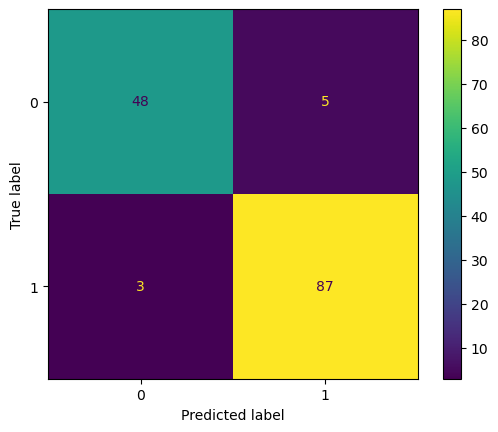

In [81]:
cm = confusion_matrix(y_test, (y_pred_prob[:,1] > 0.5).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

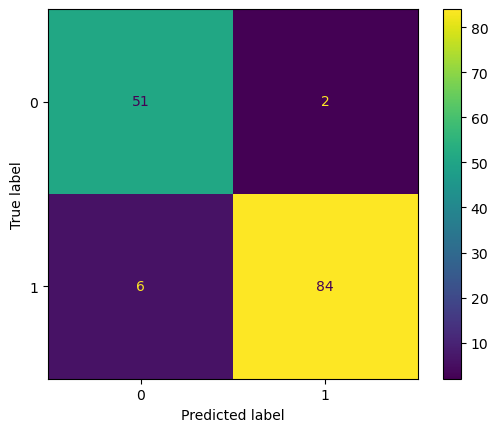

In [82]:
# Interpretation of this result after increasing the threshold 
# Increasing threshold decreases FP, but increases FN such that FP+FN remains constant for a given model+hyperparams
threshold = 0.7
cm = confusion_matrix(y_test, (y_pred_prob[:,1] > threshold).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

![TPFP](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211958&authkey=%21AAtvfe4lv5jfOGg&width=600)

In [83]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, threshold = roc_curve(y_test, model_best_rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9882599580712789

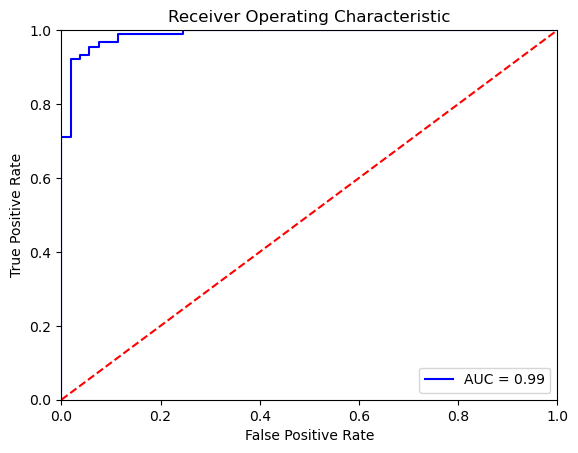

In [84]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

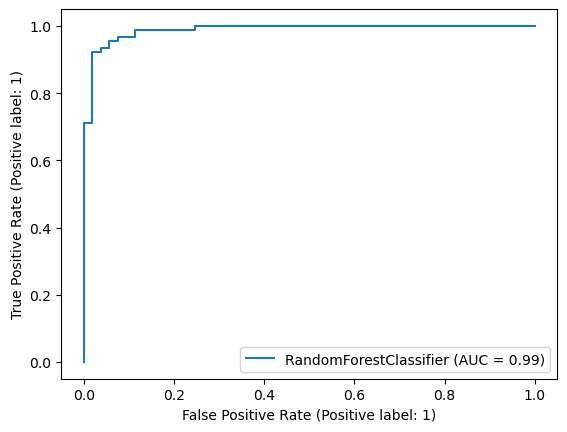

In [85]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(model_best_rf, X_test, y_test)

##### Exercise: Draw a PR curve and understand it

Dont blindly copy code from ChatGPT

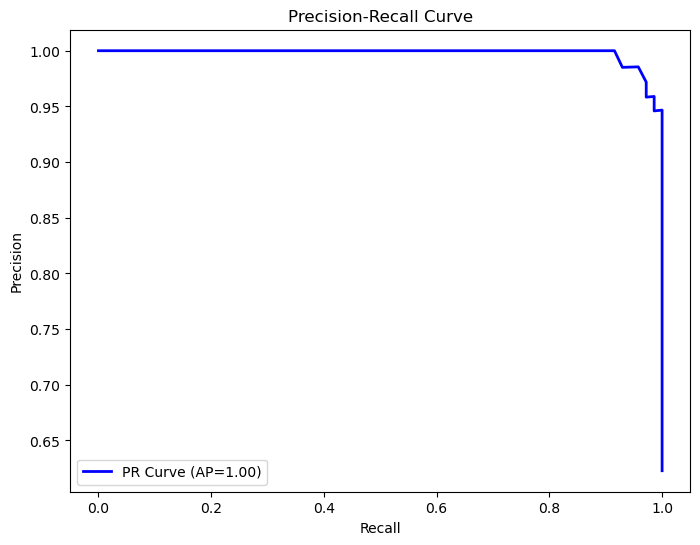

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming you have a trained model (replace RandomForestClassifier with your actual model class)
model = RandomForestClassifier()

# Assuming you have a dataset (replace X and y with your features and labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (replace this with your actual training code)
model.fit(X_train, y_train)

# Get predicted probabilities on the test set
pred_probs = model.predict_proba(X_test)[:, 1]

# True labels
y_true = y_test

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, pred_probs)

# Calculate average precision score
avg_precision = average_precision_score(y_true, pred_probs)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP={avg_precision:.2f})', color='b', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### Imbalanced Dataset classification

This is not part of syllabus and is a optional exercise. Refer to this kaggle credit card fraud dataset and look at the provided notebooks
1. https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
2. https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset

pip install imblearn for SMOTE implementation

### Multi class classification

1. Read this article to understand the classification report especially in the case of multi class classification: https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f
2. Download a kaggle dataset for multi class classification. 
3. Your goal is to run all the evaluation metrics, ROC AUC curves and classification reports and see the impact of changing threshold on False Positive and False negatives
4. Dont use iris dataset because the distributions are very cleanly separated and there wont be any real False positive and False negatives

References
1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
2. Multiclass ROC plots https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Read about One Versus One (OvO) and One versus Rest (OvR)
https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



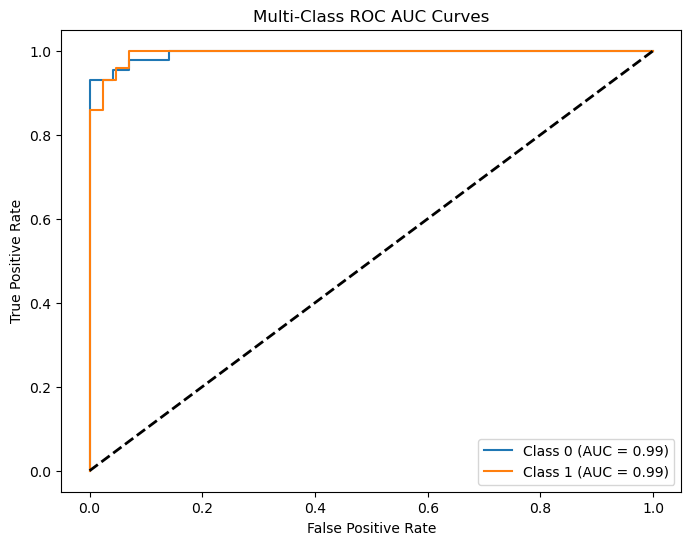

In [87]:
# Perform Evaluation Metrics, ROC AUC Curves, and Classification Reports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load and preprocess the dataset (Replace with your actual dataset loading code)
# X, y = load_your_dataset()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a multi-class classification model (Replace with your chosen model)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Obtain predictions on the test set
y_pred = model.predict(X_test)

# Calculate and visualize evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC AUC curves for each class
num_classes = len(set(y))  # Calculate the number of unique classes
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(num_classes):
    # For each class, calculate ROC curve and AUC
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC AUC curves
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC AUC Curves')
plt.legend(loc="lower right")
plt.show()


In [88]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import classification_report

# Load a sample multi-class dataset (Replace with your actual dataset loading code)
digits = load_digits()
X, y = digits.data, digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a multi-class classification model (Replace with your chosen model)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Obtain predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report for the overall multi-class model
print("Classification Report (Overall Model):")
print(classification_report(y_test, y_pred))

# Learn about One Versus One (OvO) strategy
ovo_model = OneVsOneClassifier(RandomForestClassifier(n_estimators=100))
ovo_model.fit(X_train, y_train)
ovo_pred = ovo_model.predict(X_test)

# Print the classification report for the OvO model
print("\nClassification Report (One Vs One Model):")
print(classification_report(y_test, ovo_pred))

# Learn about One Versus Rest (OvR) strategy
ovr_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100))
ovr_model.fit(X_train, y_train)
ovr_pred = ovr_model.predict(X_test)

# Print the classification report for the OvR model
print("\nClassification Report (One Vs Rest Model):")
print(classification_report(y_test, ovr_pred))


Classification Report (Overall Model):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360


Classification Report (One Vs One Model):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98       

### Stacking (aka Stacked Generalization)

Read up on Stacking Generalization and meta models

In [89]:
from sklearn.datasets import load_wine

dataset = load_wine()
X = dataset.data
y = dataset.target

In [90]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Add the target variable to the dataframe
df['target'] = dataset.target

# Print the first 5 rows of the dataframe
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [91]:
y = df.pop("target")
X = df

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [93]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.7111111111111111

In [94]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test, y_test)

0.7111111111111111

In [95]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
knn = KNeighborsClassifier(n_neighbors=7)
svm = SVC()
lr = LogisticRegression()
stacking = StackingClassifier(estimators=[('knn', knn), ("svc", svm)], final_estimator=lr)
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                               ('svc', SVC())],
                   final_estimator=LogisticRegression())

In [96]:
y_pred = stacking.predict(X_test)
accuracy = stacking.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6444444444444445


In [97]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(stacking, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator and print the best parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Use the best model for predictions
y_pred = best_model.predict(X_test)
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Best Parameters: {'knn__n_neighbors': 3, 'svc__C': 1, 'svc__kernel': 'linear'}
Accuracy: 0.8888888888888888
